<a href="https://colab.research.google.com/github/PhanDuyNhat/AI/blob/Code_AI/Prediction_of_your_future_based_on_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/250
104/104 [==============================] - 6s 18ms/step - loss: 1.3455 - accuracy: 0.4500 - val_loss: 1.0754 - val_accuracy: 0.5045
Epoch 2/250
104/104 [==============================] - 2s 16ms/step - loss: 1.1225 - accuracy: 0.5115 - val_loss: 0.9559 - val_accuracy: 0.5759
Epoch 3/250
104/104 [==============================] - 3s 25ms/step - loss: 0.9289 - accuracy: 0.6558 - val_loss: 0.6277 - val_accuracy: 0.7411
Epoch 4/250
104/104 [==============================] - 5s 43ms/step - loss: 0.7464 - accuracy: 0.7058 - val_loss: 0.6542 - val_accuracy: 0.7366
Epoch 5/250
104/104 [==============================] - 4s 33ms/step - loss: 0.6407 - accuracy: 0.7365 - val_loss: 0.5956 - val_accuracy: 0.7589
Epoch 6/250
104/104 [==============================] - 2s 16ms/step - loss: 0.6098 - accuracy: 0.7558 - val_loss: 0.6172 - val_accuracy: 0.7991
Epoch 7/250
104/104 [==============================] - 2s 16ms/step - loss: 0.6014 - accuracy: 0.7635 - val_loss: 1.3419 - val_accuracy:

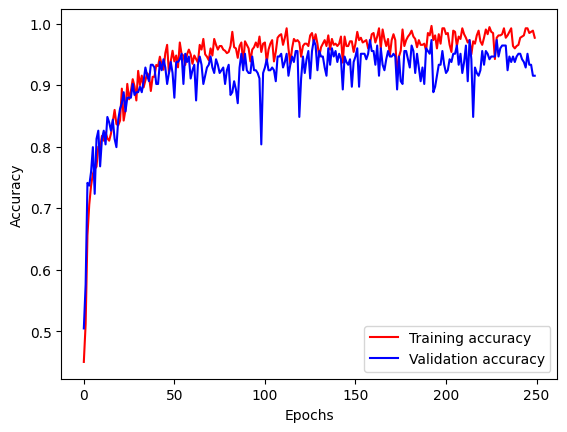

In [3]:
# Import necessary libraries
import os
from os import listdir
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, BatchNormalization, LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

# Set the data folder and parameters
folder = '/content/drive/MyDrive/PIC_AI/data_future/'
input_shape = (100,100, 3)
num_classes = 5

# Load and preprocess the data
photos, labels = list(), list()
for file in listdir(folder):
    output = 0.0
    if file.startswith('celebrity'):
        output = 1.0
    elif file.startswith('Crime'):
        output = 2.0
    elif file.startswith('joker'):
        output = 3.0
    elif file.startswith('loser'):
        output = 4.0


    photo = load_img(folder + file, target_size=input_shape)
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = np.asarray(photos)
labels = np.asarray(labels)

photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(photos, labels, test_size=0.3, random_state=70)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(X_train)

# Create the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout regularization
model.add(Dense(num_classes, activation='softmax'))



# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with data augmentation
train = model.fit(datagen.flow(X_train, y_train, batch_size=5), epochs=250, validation_data=(X_val, y_val))

# Evaluate the CNN model
score = model.evaluate(X_val, y_val, verbose=0)

# Evaluate the CNN model
loss, accuracy_val = model.evaluate(X_val, y_val)

a, b = model.evaluate(X_train, y_train)

print("Loss:", a)
print("Accuracy:", b)

# print("Loss:", loss)
# print("Accuracy:", accuracy_val)

# Save the trained CNN model
model.save('/content/drive/MyDrive/colab/Prediction of your future based on face.h5/')


import matplotlib.pyplot as plt

accuracy = train.history['accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label='Training accuracy')

val_accuracy = train.history['val_accuracy']  # Use 'val_accuracy' instead of 'accuracy_val'
plt.plot(epochs, val_accuracy, 'b-', label='Validation accuracy')  # Use 'val_accuracy' instead of 'accuracy_val'

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 321ms/step
You will be a crime


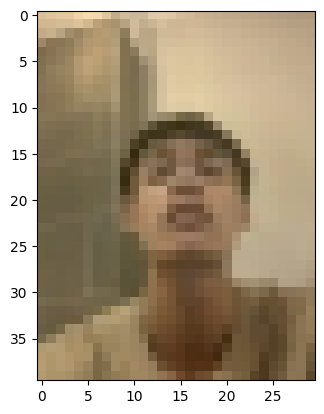

1/1 [==============================] - 0s 22ms/step
You will be a crime


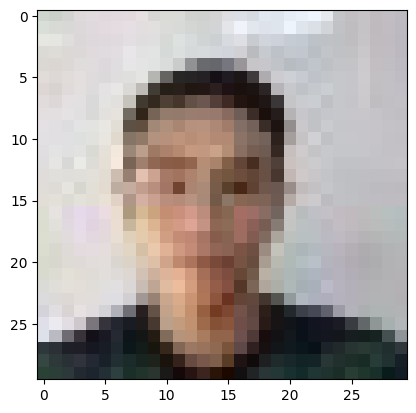

1/1 [==============================] - 0s 18ms/step
You will be a celebrity


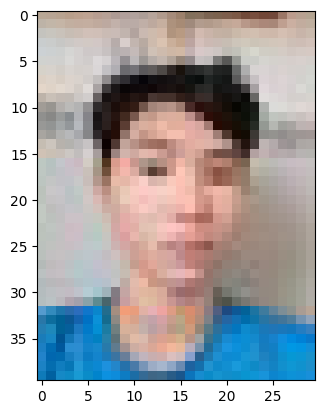

1/1 [==============================] - 0s 22ms/step
You will be a crime


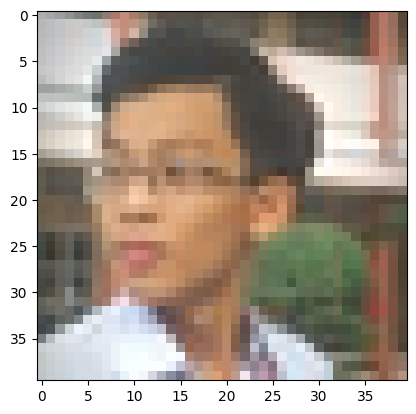

1/1 [==============================] - 0s 34ms/step
You will be a celebrity


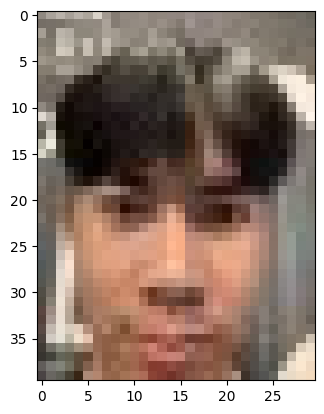

In [4]:
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, BatchNormalization, LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from numpy import asarray, save
from keras.utils import to_categorical
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/colab/Prediction of your future based on face.h5/')

# Load the image to be predicted


folder = '/content/drive/MyDrive/PIC_TEST/datafuture_test'
for file in listdir(folder):
  if not file.endswith('.jpg'):
    continue # Skip directories and non-image files
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (100, 100))
  photo = img_to_array(photo)
  photo = photo.reshape(1, 100, 100, 3)

  # Preprocess the image
  photo = photo.astype('float32') / 255.0

  # Make a prediction
  pred = model.predict(photo)

  # Get the predicted class
  class_idx = np.argmax(pred)

  # Print the predicted class
  if class_idx == 1:
      print('You will be a celebrity')
  elif class_idx == 2:
      print('You will be a crime')
  elif class_idx == 3:
      print('You will be a joker')
  elif class_idx == 4:
      print('You will be a loser')
  else:
      print('Unknown class')

  plt.show()